Box dimensions (nm)
[3, 3, 3]
Grid cube volume (nm^3): 0.125
Grid cube size (nm): x:0.5, y:0.5, z:0.5
Number of computations: 1079784
Number of iterations: 216


Processing grid centers:   0%|          | 0/216 [00:00<?, ?it/s]

Added the new sphere to the empty list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.


Processing grid centers:  31%|███       | 66/216 [00:00<00:00, 636.48it/s]

Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.
Added the new sphere to the list.


Processing grid centers:  93%|█████████▎| 201/216 [00:00<00:00, 988.96it/s]

Added the new sphere to the list.


Processing grid centers: 100%|██████████| 216/216 [00:00<00:00, 975.54it/s]

[(array([0. , 0.5, 2.5]), 0.04910000000000003), (array([0., 1., 0.]), 0.1231000000000001), (array([0., 1., 1.]), 0.04410000000000003), (array([0., 2., 0.]), 0.03110000000000002), (array([0. , 2. , 0.5]), 0.07910000000000006), (array([0., 2., 1.]), 0.015100000000000006), (array([0. , 2.5, 2. ]), 0.03110000000000002), (array([0.5, 0.5, 0. ]), 0.01910000000000001), (array([0.5, 2. , 2.5]), 0.024100000000000014), (array([1., 0., 0.]), 0.03210000000000002), (array([1. , 2. , 2.5]), 0.0091), (array([1. , 2.5, 0.5]), 0.0071), (array([1. , 2.5, 2.5]), 0.04910000000000003), (array([1.5, 0. , 0. ]), 0.08810000000000007), (array([1.5, 0. , 1.5]), 0.0091), (array([1.5, 2. , 2.5]), 0.0091), (array([2., 1., 0.]), 0.010100000000000001), (array([2. , 1. , 1.5]), 0.010100000000000001), (array([2., 2., 0.]), 0.02010000000000001), (array([2.5, 0.5, 0. ]), 0.03510000000000002), (array([2.5, 1. , 1.5]), 0.029100000000000018), (array([2.5, 1.5, 0. ]), 0.0081), (array([2.5, 1.5, 1. ]), 0.05010000000000003), 

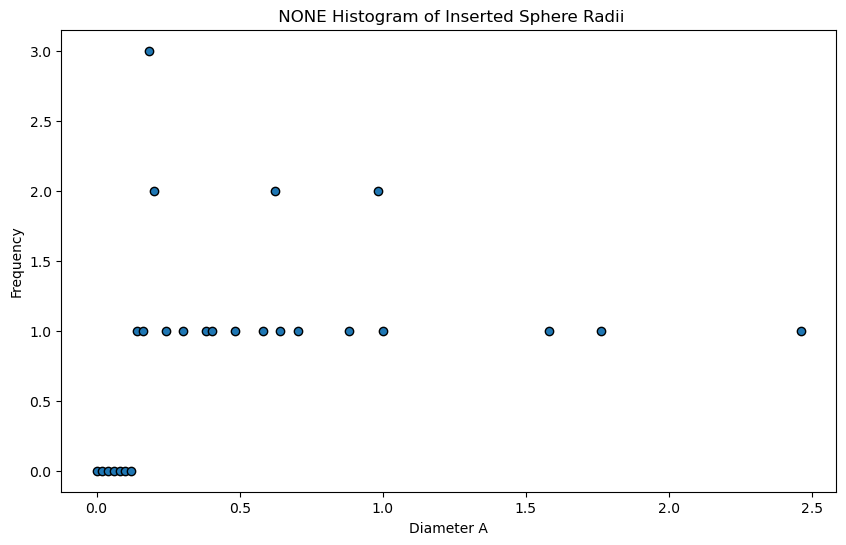

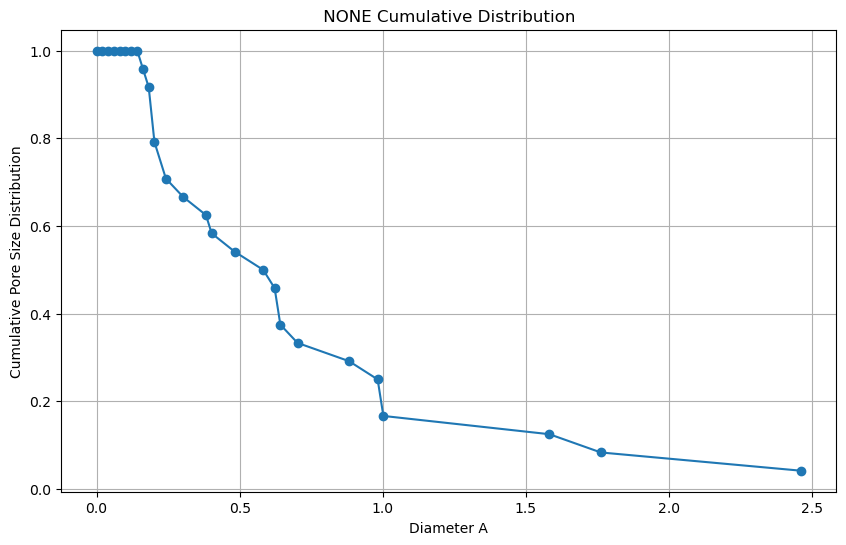

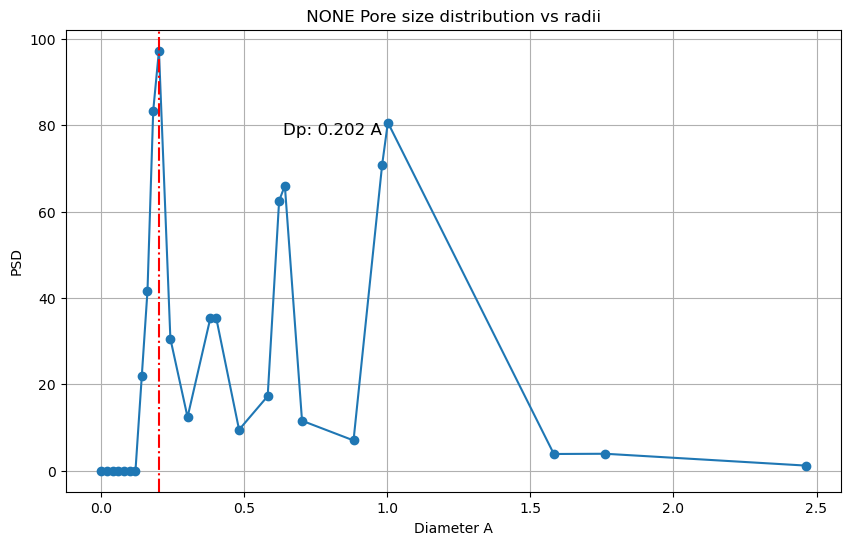

In [1]:
import time
import pickle 
from psd_functions import *

file_path = os.getcwd() + "/results"
data = []
for i in range(1, 5000):
    dot = {
        "name": f"dot{i}",
        "x": uniform(0, 3),
        "y": uniform(0, 3),
        "z": uniform(0, 3),
        "radius": uniform(0.1, 0.2)  # Random radius between 0.1 and 1.5
    }
    data.append(dot)

########################################################################################################################
start_time = time.time()
unique_radii, counts, cdf_reversed,  derivative, x_fit, y_fit, params, sphere_list = PSD(data,
                                                                            number_grid_points = 2, 
                                                                            box_dimensions_array = [3,3,3],
                                                                            step_size = 0.001, # In nm (radius) was 0.001
                                                                            units = "A",
                                                                            diameter=True,
                                                                            Gaussian_Fit = False, 
                                                                            GPU = False)
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")
'''
#Cython code
unique_radii, counts, cdf_reversed,  derivative, x_fit, y_fit, params = PSD_cython(data,
                                                                            number_grid_points = 10,
                                                                            box_dimensions_array = box_dimensions_,
                                                                            step_size = 0.001, # In nm (radius)
                                                                            units = "A",
                                                                            diameter=True,)
                                                                            

'''
PSD_histogram = {k: v for k, v in zip(unique_radii, counts)}
PSD_Cumulative = {k: v for k, v in zip(unique_radii, cdf_reversed)}
PSD_derivative = {k: v for k, v in zip(unique_radii, derivative)}

######## 1 #################################################################
with open(os.path.join(file_path, "PSD_histogram_trial.json"), 'w') as json_file:
    json.dump(PSD_histogram, json_file, indent=4)

print(f'The dictionary has been saved as {os.path.join(file_path, "PSD_histogram.json")}')
################################################################################################

######## 2 #################################################################
with open(os.path.join(file_path, "PSD_Cumulative_trial.json"), 'w') as json_file:
    json.dump(PSD_Cumulative, json_file, indent=4)

print(f'The dictionary has been saved as {os.path.join(file_path, "PSD_Cumulative.json")}')
################################################################################################

######## 3 #################################################################
with open(os.path.join(file_path, "PSD_derivative_trial.json"), 'w') as json_file:
    json.dump(PSD_derivative, json_file, indent=4)

print(f'The dictionary has been saved as {os.path.join(file_path, "PSD_derivative.json")}')
################################################################################################
with open(os.path.join(file_path, 'sphere_list_trial.pyx'), 'wb') as file:
    pickle.dump(sphere_list, file)


plot_PSD(file_path, unique_radii,counts,cdf_reversed, derivative, units = "A", Diameter = True , save = True )

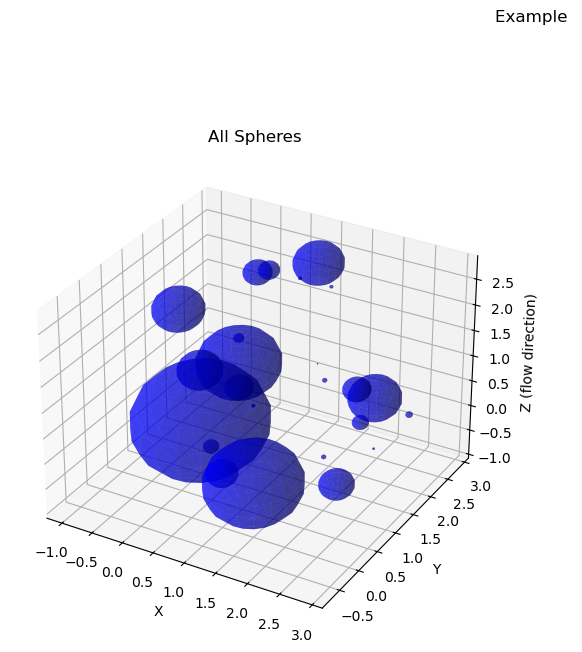

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

tuple_list = [
  
    ("Example ", "results"),
]

for tup in tuple_list:
    # Load the list of tuples (spheres) from the .pyx file
    file_path = os.getcwd() + '/{}/sphere_list_trial.pyx'.format(tup[1])

    with open(file_path, 'rb') as file:
        sphere_list = pickle.load(file)

    # Extract the radii and find min and max
    radii = np.array([radius for _, radius in sphere_list])
    min_radius, max_radius = np.min(radii), np.max(radii)

    # Normalize the radii to the range [0.01, 1]
    normalized_radii = 0.01 + (radii - min_radius) / (max_radius - min_radius) * (1 - 0.01)
    #normalized_radii  = radii
    # Initialize a larger figure with 4 subplots arranged in a 2x2 grid
    fig = plt.figure(figsize=(14, 14))
    fig.suptitle("{}".format(tup[0]))
    # First subplot: Plot all spheres
    ax1 = fig.add_subplot(221, projection='3d')

    for (center, radius), norm_radius in zip(sphere_list, normalized_radii):
        x, y, z = center
        
        # Create a mesh grid for the sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        xs = x + norm_radius * np.cos(u) * np.sin(v)
        ys = y + norm_radius * np.sin(u) * np.sin(v)
        zs = z + norm_radius * np.cos(v)
        
        # Plot the surface of the sphere
        ax1.plot_surface(xs, ys, zs, color='b', alpha=0.5)

    # Set plot labels for the first subplot
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z (flow direction)')
    ax1.set_title('All Spheres')



    # Show the plot
    plt.show()